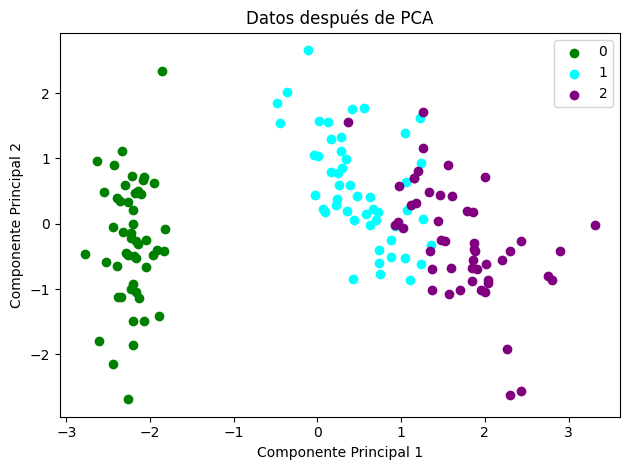

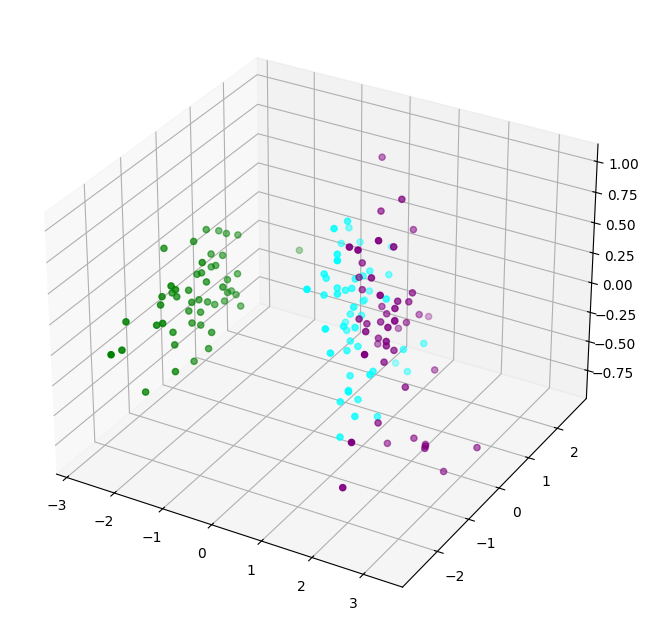

In [2]:
#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-BIBLIOTECAS-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-METIDA DE DATOS-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Escalada por si las dudas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
cov_matrix = np.cov(X_scaled, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-PCA CON 2 COMPONENTES-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
componentes2 = 2
top_eigenvectors = eigenvectors[:, :componentes2]
X_pca2 = X_scaled.dot(top_eigenvectors)

# Grafica 2D
for target, color in zip(np.unique(y), ['g', 'aqua', 'purple']):
    indices_to_keep = y == target
    plt.scatter(X_pca2[indices_to_keep, 0], X_pca2[indices_to_keep, 1], c=color, label=target)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Datos después de PCA')

plt.legend()
plt.tight_layout()
plt.show()





#-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-PCA CON 3 COMPONENTES-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

componentes3 = 3
top_eigenvectors = eigenvectors[:, :componentes3]
X_pca3 = X_scaled.dot(top_eigenvectors)
#Arreglos y matrices
c1=[]
c2=[]
c3=[]
# Matrices por separado
for i in range(len(X_pca3)):
  c1.append(X_pca3[i][0])
  c2.append(X_pca3[i][1])
  c3.append(X_pca3[i][2])
c11=[]
c12=[]
c13=[]
c21=[]
c22=[]
c23=[]
c31=[]
c32=[]
c33=[]
# Se ordena chido en un for
for i in range(len(X_pca3)):
  if i<50:
    c11.append(c1[i])
    c12.append(c2[i])
    c13.append(c3[i])
  if i>=50 and i<100:
    c21.append(c1[i])
    c22.append(c2[i])
    c23.append(c3[i])
  if i>=100 and i<150:
    c31.append(c1[i])
    c32.append(c2[i])
    c33.append(c3[i])
a=[2,3,4]
# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(c11,c12,c13,color="g")
ax.scatter(c21,c22,c23,color="aqua")
ax.scatter(c31,c32,c33,color="purple")
plt.show()
